In [27]:
# import all necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import ruptures as rpt

In [2]:
# import data
db_data = pd.read_excel("trip_22052023_bearing.xlsx", sheet_name="Sheet1")
db_data

,TimeStamp,U-LGS1-AY-81103B-AI,U-LGS1-AY-81103C-AI,U-LGS1-FIT-81103A-AI,U-LGS1-FIT-81103B-AI,U-LGS1-GB-X-PK-PK-70-AI,U-LGS1-LGB-Y-PK-PK-340-AI,U-LGS1-TGB-X-PK-PK-270-AI,U-LGS1-TGB-Y-PK-PK-340-AI,U-LGS1-TI-81104H-AI,U-LGS1-TI-81104I-AI,U-LGS1-TI-81104J-AI,U-LGS1-TI-81104K-AI,U-LGS1-TI-81104L-AI,U-LGS1-UGB-X-PK-PK-70-AI,U-LGS1-UGB-Y-PK-PK-340-AI
0,05/22/2023 00:00:00,16.4,20.2,32.4,966.2,126.5,118.5,87.5,69.7,50.0,50.0,56.0,53,70.0,203.3,196.5
1,05/22/2023 00:00:10,16.4,20.2,32.4,964.2,122.0,110.0,97.6,80.4,50.0,50.0,56.0,53,70.0,193.9,209.3
2,05/22/2023 00:00:20,16.4,20.2,32.4,970.1,131.7,105.3,92.1,66.5,50.0,50.0,56.0,53,70.0,179.8,201.1
3,05/22/2023 00:00:30,16.4,20.2,32.4,966.7,129.4,103.5,91.3,62.5,50.0,50.0,56.0,53,70.0,184.6,197.7
4,05/22/2023 00:00:40,16.4,20.2,32.4,967.6,171.1,110.0,84.5,67.7,50.0,50.0,56.0,53,70.0,181.4,185.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,05/22/2023 23:59:18,16.0,19.8,32.4,954.2,122.4,93.6,78.7,64.5,49.2,49.4,55.4,53,70.4,155.6,177.2
8636,05/22/2023 23:59:28,16.0,19.8,32.4,953.8,126.5,92.7,92.7,59.6,49.2,49.4,55.4,53,70.4,191.3,182.7
8637,05/22/2023 23:59:38,16.0,19.8,32.4,955.8,120.1,98.7,76.6,59.2,49.2,49.4,55.4,53,70.4,190.9,184.4
8638,05/22/2023 23:59:48,16.0,19.8,32.4,954.7,122.7,95.5,84.7,62.0,49.2,49.4,55.4,53,70.4,163.3,187.1


In [73]:
# filter the data
# select range of data (if necessary)
db_data['TimeStamp'] = pd.to_datetime(db_data['TimeStamp'])
start_time = pd.to_datetime('2023-05-22 19:00:00')
end_time = pd.to_datetime('2023-05-22 21:00:00')

db_data_observed = db_data[(db_data['TimeStamp']>=start_time) & (db_data['TimeStamp']<=end_time)]
db_data_observed = db_data_observed.reset_index(drop=True)

In [74]:
# preaparing data to a numpy array
time_data = db_data_observed['TimeStamp']
obs_data = db_data_observed.drop(columns=['TimeStamp'])
label = obs_data.columns
obs_data = obs_data.to_numpy().T

time_data

0     2023-05-22 19:00:07
1     2023-05-22 19:00:17
2     2023-05-22 19:00:27
3     2023-05-22 19:00:37
4     2023-05-22 19:00:47
              ...        
715   2023-05-22 20:59:17
716   2023-05-22 20:59:27
717   2023-05-22 20:59:37
718   2023-05-22 20:59:47
719   2023-05-22 20:59:57
Name: TimeStamp, Length: 720, dtype: datetime64[ns]

/tmp/ipykernel_13506/3413248514.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


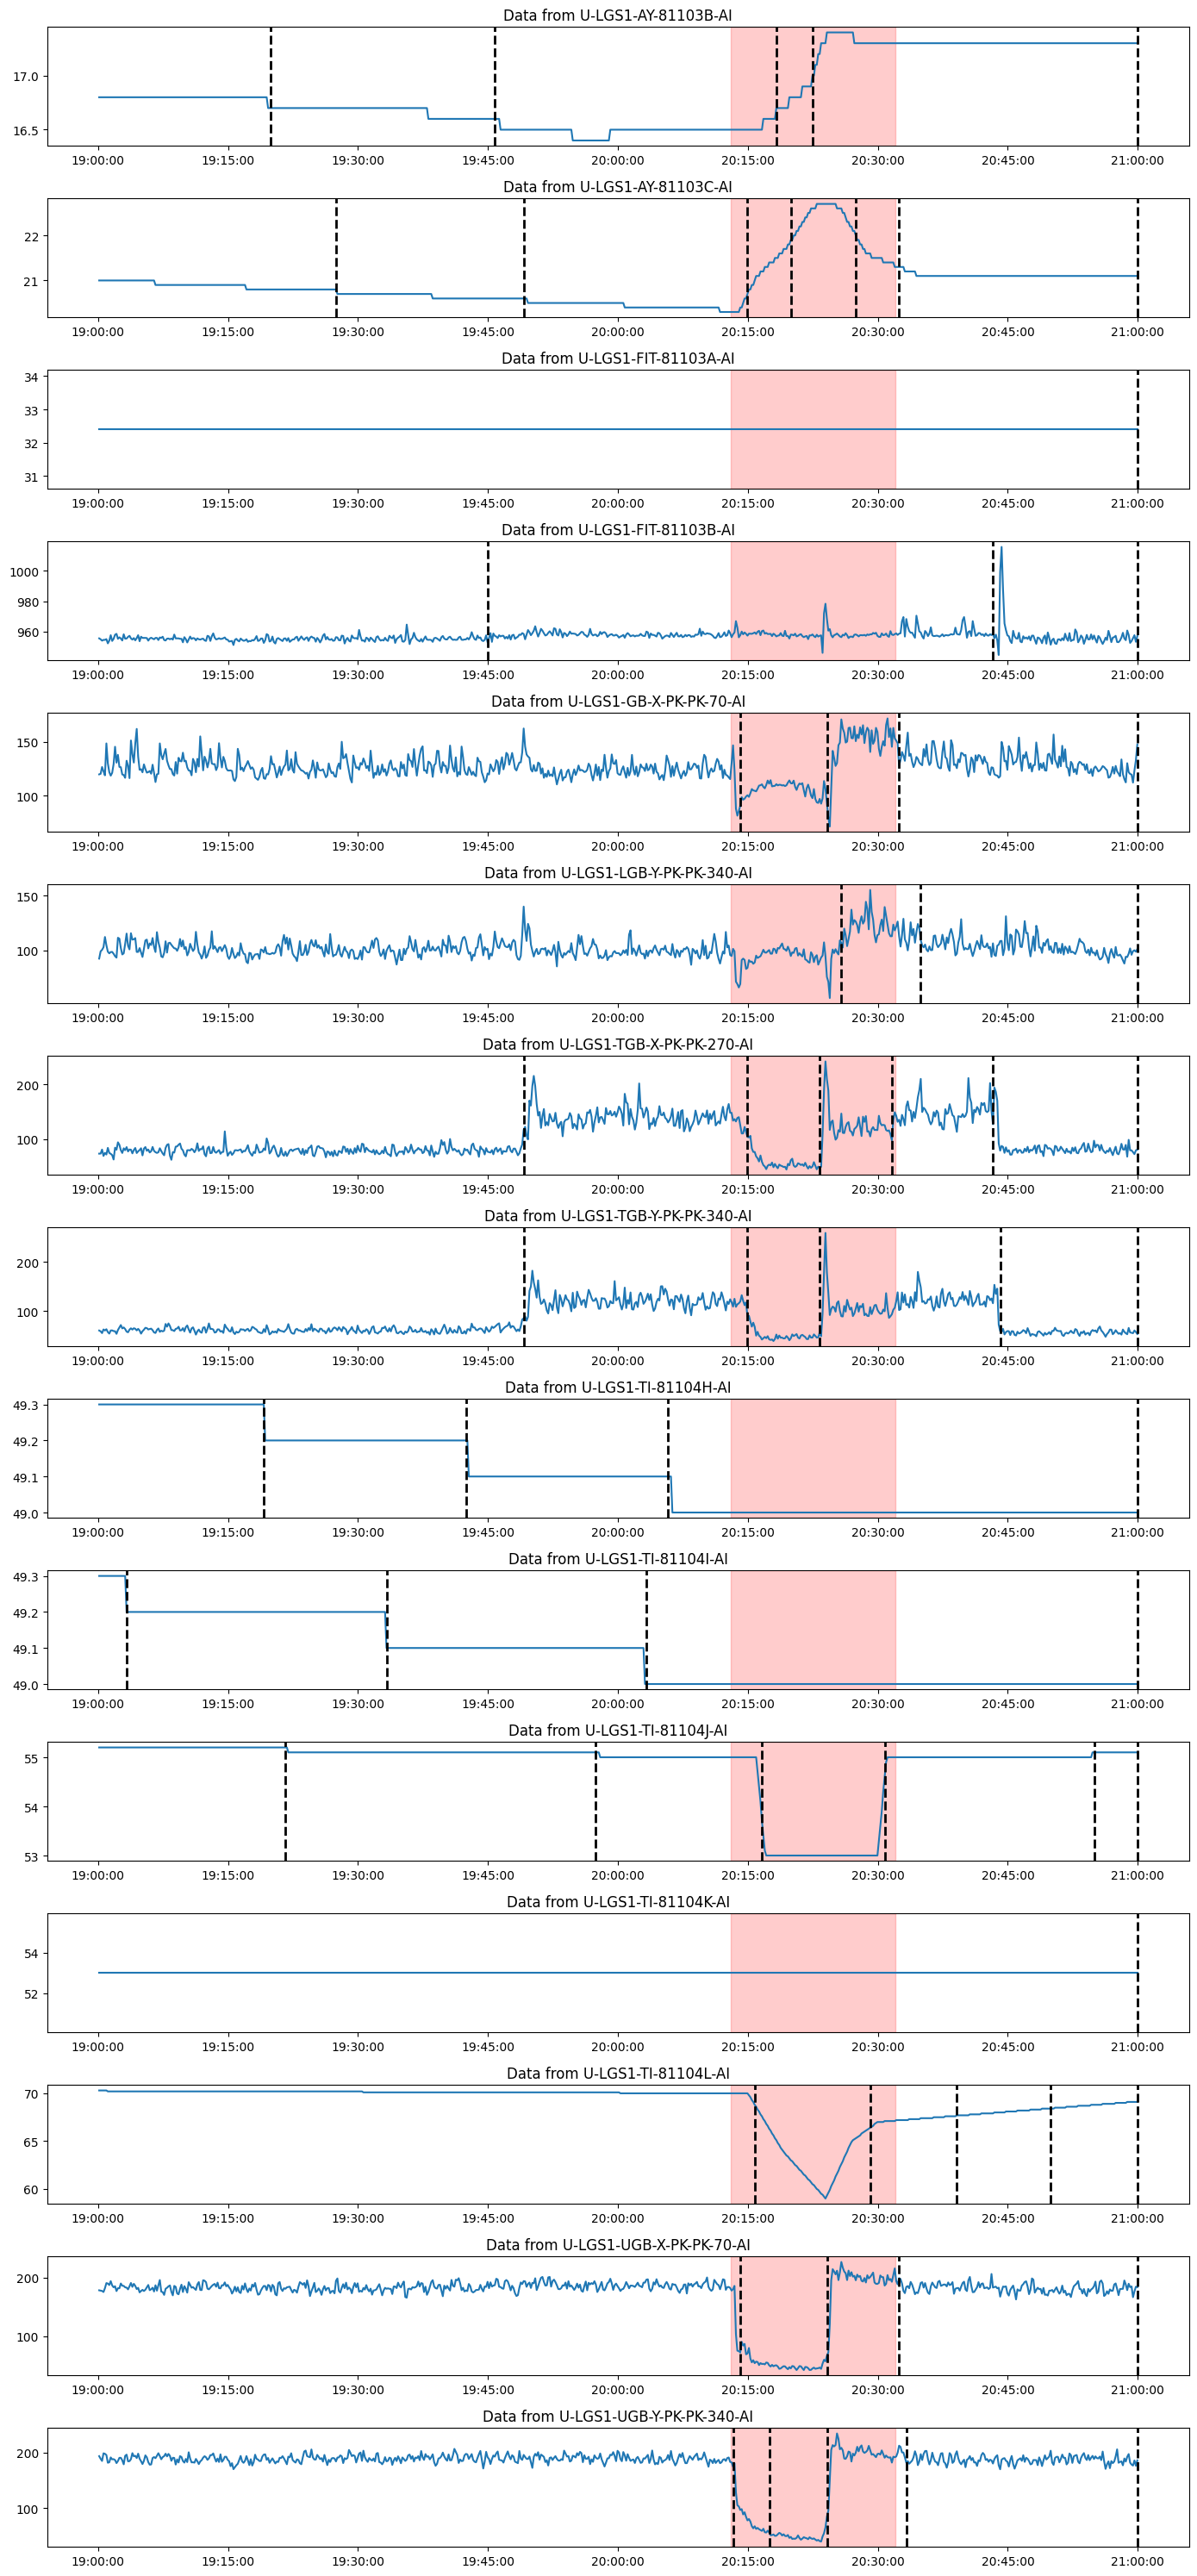

In [85]:
# implement the hange point detection algorithm
def detect_change_points(signal):
    algo = rpt.Pelt(model="rbf").fit(signal)
    result = algo.predict(pen=10)  # Adjust `pen` based on data characteristics
    return result

# change_points_combined = detect_change_points_combined(obs_data[0])

signals = obs_data
n_series = np.shape(signals)[0]

change_point_results = []

for i in range(n_series):
    signal = signals[i, :]
    change_points = detect_change_points(signal)
    change_point_results.append(change_points)


fig = plt.figure(figsize=(14, 30))

# Plot each signal and detected change points
for i in range(n_series):
    ax = fig.add_subplot(n_series, 1, i + 1)
    ax.plot(time_data, signals[i, :])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    ax.axvspan(
           '2023-05-22 20:13:00',
           '2023-05-22 20:32:00',
           alpha=0.2,
           color='red'
        )

    for cp in change_point_results[i]:
        ax.axvline(time_data[cp-1], color='black', linestyle='--', linewidth=2)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    ax.set_title("Data from " + label[i])
    
fig.tight_layout()
fig.show()

In [17]:
# Plot each signal and detected change points
for i in range(n_series):
    print(i)
    plt.subplot(n_series, 1, i + 1)
    plt.plot(time_data, signals[i, :], label=f"Signal {i + 1}")
    plt.axvspan(
           '2023-05-22 20:13:00',
           '2023-05-22 20:32:00',
           alpha=0.2,
           color='red'
        )

    for cp in change_point_results[i]:
        plt.axvline(cp, color='b', linestyle='--', linewidth=2)
    plt.title(f"Signal {i + 1}")
    plt.legend()

plt.tight_layout()
plt.show()

0
1


KeyboardInterrupt: 